In [1]:
import tenpy
from tenpy.networks.mps import MPS
from tenpy.algorithms import dmrg, tebd, vumps
import yaml
from chiral_magnet import *
from aux.plot_lobs import *
import numpy as np
import pandas as pd

In [2]:
pwd = '/Users/andreas.haller/gits/skyrmion_liquid/'
with open(f'{pwd}cm_triangular.yml', 'r') as f:
    sim = yaml.safe_load(f)
M = chiral_magnet(sim['model_params'])

In [3]:
sites = M.lat.mps_sites()
psi = MPS.from_desired_bond_dimension(sites, 1, bc='infinite')
dmrg_params = sim['algorithm_params']

In [14]:
dmrg_params['trunc_params']['chi_max'] = 128
eng = dmrg.TwoSiteDMRGEngine(psi, M, dmrg_params)
info = dmrg.run(psi, M, dmrg_params)

/Users/andreas.haller/opt/anaconda3/lib/python3.9/site-packages/tenpy/tools/params.py:230: UserWarning: unused options for config TwoSiteDMRGEngine:
['E_tol_to_trunc', 'P_tol_max', 'P_tol_min', 'P_tol_to_trunc', 'active_sites', 'max_E_err', 'max_S_err', 'max_hours', 'max_sweeps', 'max_trunc_err', 'mixer', 'norm_tol', 'norm_tol_final', 'norm_tol_iter', 'update_env']
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


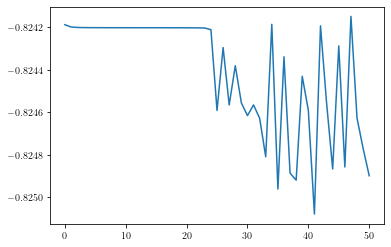

In [13]:
plt.plot(info['sweep_statistics']['E'])

/var/folders/zj/yf2gq6_d1rj4nv84tx00lx7jy7sr9y/T/ipykernel_24094/83794149.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


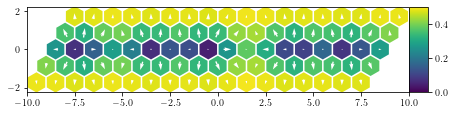

In [9]:
Sx,Sy,Sz = [psi.expectation_value(f'S{i}') for i in 'xyz']

lat = M.lat
pos = np.asarray([lat.position(lat.mps2lat_idx(i)) for i in range(psi.L)])
pos_av = np.mean(pos, axis=0)
pos = pos - pos_av

df = pd.DataFrame()
df['x'] = pos[:,0]
df['y'] = pos[:,1]
df['S_x'] = Sx
df['S_y'] = Sy
df['S_z'] = Sz
df['S'] = (Sx**2+Sy**2+Sz**2)**0.5

fig, ax = plt.subplots(1,1)

imag = ax.scatter(df['x'], df['y'], marker='h', edgecolor='None', s=410, cmap='viridis', c=df['S'], vmin=0, vmax=0.5)
ax.quiver(df['x'], df['y'], df['S_x'], df['S_y'], units='xy', width=0.07, scale=0.5, pivot='middle', color='white')
ax.set_aspect('equal')
# ax.set_title(title)

axins = inset_axes(
    ax,
    width="5%",  # width: 5% of parent_bbox width
    height="100%",  # height: 50%
    loc="lower left",
    bbox_to_anchor=(1, 0, 1, 1),
    bbox_transform=ax.transAxes,
    borderpad=0
)
cbar = fig.colorbar(imag, cax=axins, orientation = 'vertical')
# ax.axis('off')

ax.set_xlim([min(df['x'])-0.5, max(df['x'])+0.5])
ax.set_ylim([min(df['y'])-0.5, max(df['y'])+0.5])

plt.tight_layout()
plt.show()